# ImageXD 2017

## NumPy, SciPy, matplotlib overview

## Introduction to NumPy

  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

In [1]:
import numpy as np
np.__version__

'1.12.1'

In [2]:
# This sets up the notebook to display matplotlib plots
# inside the browser
%matplotlib inline

# This is the standard way of importing matplotlib
import matplotlib.pyplot as plt

### Where to get help

- docstrings (via IPython / Jupyter `?`-syntax)
- http://docs.scipy.org, specifically https://docs.scipy.org/doc/numpy/reference/
- Forums: mailing list, http://stackoverflow.com

### Where do I learn more?

- <a href="http://mentat.za.net/numpy/intro/intro.html">NumPy introductory tutorial</a>
- <a href="http://scipy-lectures.github.com">SciPy Lectures</a>

Let's also make sure you are comfortable in your Jupyter environment:

- Tab completion
- Docstring inspection (`?` and repeated `shift-TAB`)
- Magic commands: %timeit, %paste / %cpaste, %loadpy, %run
- Compare Jupyter vs IPython

### NumPy vs pure Python—a speed comparison

In [3]:
x = np.random.random(1024)

%timeit [t**2 for t in x]
%timeit x**2

The slowest run took 5.77 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 188 µs per loop
The slowest run took 10.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.02 µs per loop


### The structure of a NumPy array

<img src="ndarray_struct.png"/>

In [25]:
x = np.array([[1, 4], [2, 8]], dtype=np.uint8)
x

array([[1, 4],
       [2, 8]], dtype=uint8)

In [26]:
x.shape, x.dtype, x.strides, x.size, x.ctypes.data

((2, 2), dtype('uint8'), (2, 1), 4, 94129311509760)

In [27]:
import ctypes
list(ctypes.string_at(x.ctypes.data, x.size * x.itemsize))

[1, 4, 2, 8]

Look at the transpose; what changed?

In [29]:
y = x.T
y.shape, y.dtype, y.strides, y.size, y.ctypes.data

((2, 2), dtype('uint8'), (1, 2), 4, 94129311509760)

### Constructing arrays

In [34]:
np.zeros((3, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [35]:
np.ones((2, 2))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [36]:
np.array([[1, 2], [-1, 5]])

array([[ 1,  2],
       [-1,  5]])

In [37]:
np.zeros_like(x)

array([[0, 0],
       [0, 0]], dtype=uint8)

In [38]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [39]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [42]:
# Do this to make your experiment repeatable
np.random.seed(42)

In [43]:
np.random.random((3, 3))

array([[ 0.37454012,  0.95071431,  0.73199394],
       [ 0.59865848,  0.15601864,  0.15599452],
       [ 0.05808361,  0.86617615,  0.60111501]])

In [44]:
x = np.random.random((2,2,3,2,2))

In [60]:
print x.shape

(2, 2, 3, 2, 2)

A slightly more verbose, but perhaps less magical syntax:

In [57]:
rng = np.random.RandomState(42)

In [58]:
rng.uniform(size=(3, 3))

array([[ 0.37454012,  0.95071431,  0.73199394],
       [ 0.59865848,  0.15601864,  0.15599452],
       [ 0.05808361,  0.86617615,  0.60111501]])

### Shape

In [59]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [60]:
x.reshape((3, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Visualization

In [61]:
import matplotlib.pyplot as plt

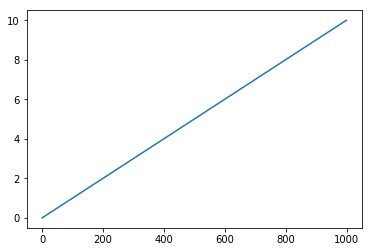

In [304]:
x = np.linspace(0, 10, 1000)
plt.plot(x);

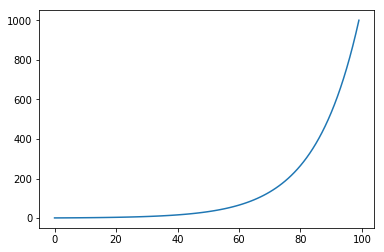

In [305]:
# Or geometric progression:
x = np.geomspace(1, 1000, 100)
plt.plot(x);

### Indexing

In [74]:
x = np.array([[1, 2, 3], [3, 2, 1]])
x

array([[1, 2, 3],
       [3, 2, 1]])

In [75]:
x[0, 1]

2

In [76]:
x[1]

array([3, 2, 1])

In [78]:
x[:, 1:3]

array([[2, 3],
       [2, 1]])

#### Fancy indexing—indexing with arrays

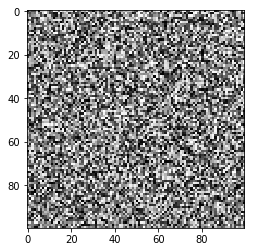

In [89]:
x = np.random.random((100, 100))
plt.imshow(x, cmap='gray')

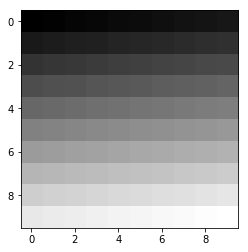

In [90]:
x = np.arange(100).reshape((10, 10))
plt.imshow(x, cmap='gray')

In [91]:
mask = (x < 50)
mask[:5, :5]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [92]:
mask.shape

(10, 10)

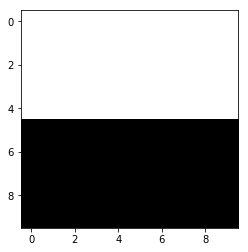

In [96]:
plt.imshow(mask, cmap='gray');

In [97]:
x[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

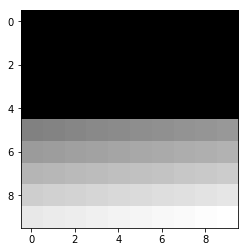

In [98]:
x[mask] = 0
plt.imshow(x, cmap='gray');

### Views

In [107]:
x = np.arange(10)
y = x[0:3]

print(x, y)

[0 1 2 3 4 5 6 7 8 9] [0 1 2]


In [108]:
y.fill(8)

In [109]:
print(x, y)

[8 8 8 3 4 5 6 7 8 9] [8 8 8]


### Data types

In [111]:
x = np.array([1,2,3])
print(x.dtype)

int64


In [112]:
x = np.array([1.5, 2, 3])
print(x.dtype)

float64


In [113]:
x = np.array([1, 2, 3], dtype=np.float)
print(x.dtype)

float64


### Broadcasting


#### Scalar to vector

<img src="broadcast_scalar.svg" width="400em"/>

#### Vector to matrix

<img src="broadcast_2D.png" width="300em"/>

In [115]:
x, y = np.ogrid[:5:0.5, :5:0.5]

In [116]:
x.shape, y.shape

((10, 1), (1, 10))

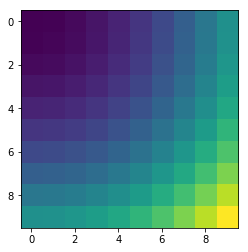

In [120]:
plt.imshow(x**2 + y**2);

## Expressions and universal functions

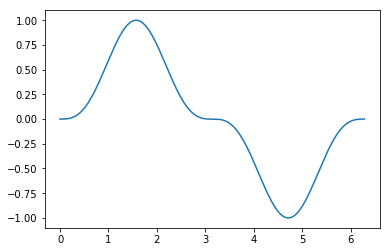

In [124]:
x = np.linspace(0, 2 * np.pi, 1000)

# numpy ufuncs operate on each element of an array
y = np.sin(x) ** 3

plt.plot(x, y);

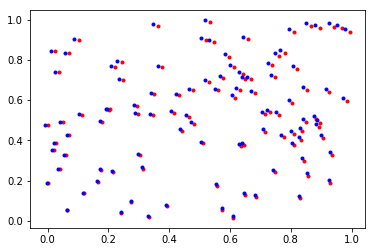

In [128]:
theta = np.deg2rad(1)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
v = np.random.random((100, 2))
v_ = (R @ v.T).T

plt.plot(v[:, 0], v[:, 1], 'r.')
plt.plot(v_[:, 0], v_[:, 1], 'b.');

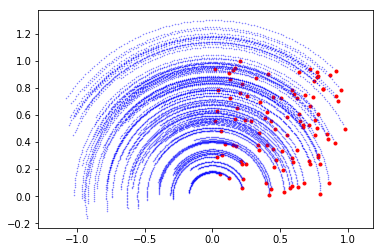

In [138]:
theta = np.deg2rad(1)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
v = np.random.random((100, 2))

# Plot dataset
plt.plot(v[:, 0], v[:, 1], 'r.')

v_rot = (R @ v.T).T

for i in range(100):
    v_rot = (R @ v_rot.T).T
    plt.plot(v_rot[:, 0], v_rot[:, 1], 'b.', markersize=1, alpha=0.5)

plt.axis('equal');

### Input/output

In [140]:
hand = np.loadtxt('hand.txt')
hand[:5]

array([[ 1.64516129,  1.16145833],
       [ 1.64516129,  1.59375   ],
       [ 1.35080645,  1.921875  ],
       [ 1.375     ,  2.18229167],
       [ 1.68548387,  1.9375    ]])

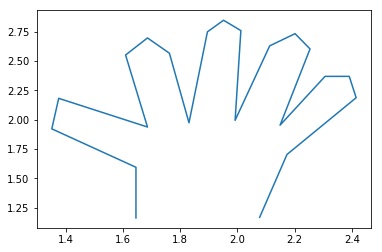

In [142]:
plt.plot(hand[:, 0], hand[:, 1]);

In [36]:
# Use the NumPy binary format--do not pickle!
# np.save and np.savez

### Structured arrays

In [183]:
dt = np.dtype([('station', 'S10'), ('year', int), ('level', (float, 12))])

In [184]:
x = np.zeros((3,), dtype=dt)
x

array([(b'', 0, [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
       (b'', 0, [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
       (b'', 0, [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])], 
      dtype=[('station', 'S10'), ('year', '<i8'), ('level', '<f8', (12,))])

In [185]:
r = np.loadtxt('rainfall.txt', dtype=dt)

In [186]:
r['station']

array([b'AAEF', b'CABF', b'BDII', b'IPLS'], 
      dtype='|S10')

In [188]:
mask = (r['station'] == b'AAEF')
r[mask]

array([ (b'AAEF', 1980, [ 0.1,  0.3,  1.1,  0.4,  3.1,  1.8,  8.6,  3.4,  1.2,  3.3,  9.5,  1.2])], 
      dtype=[('station', 'S10'), ('year', '<i8'), ('level', '<f8', (12,))])

In [189]:
r[mask]['level']

array([[ 0.1,  0.3,  1.1,  0.4,  3.1,  1.8,  8.6,  3.4,  1.2,  3.3,  9.5,
         1.2]])

If you're heading in this direction, you may want to involve Pandas:

In [217]:
import pandas as pd
df = pd.read_csv('rainfall.txt', header=None, sep=' ',
                 names=('station', 'year',
                        'jan', 'feb', 'mar', 'apr', 'may', 'jun',
                        'jul', 'aug', 'sep', 'oct', 'nov', 'dec'))
df

,station,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,AAEF,1980,0.1,0.3,1.1,0.4,3.1,1.8,8.6,3.4,1.2,3.3,9.5,1.2
1,CABF,1981,3.1,3.3,3.2,3.5,3.1,1.2,2.3,2.8,2.0,1.1,1.2,3.4
2,BDII,1990,0.0,0.0,0.1,0.0,0.2,0.3,0.4,0.6,0.8,0.9,10.0,0.0
3,IPLS,2010,5.1,5.2,5.1,5.6,5.7,5.1,5.0,4.8,4.3,4.4,4.6,4.1


In [219]:
df['station']

0    AAEF
1    CABF
2    BDII
3    IPLS
Name: station, dtype: object

In [222]:
aaef_data = df[df['station'] == 'AAEF']

In [224]:
aaef_data.values

array([['AAEF', 1980, 0.1, 0.3, 1.1, 0.4, 3.1, 1.8, 8.6, 3.4, 1.2, 3.3,
        9.5, 1.2]], dtype=object)

Oh, look what came out there!

In [230]:
aaef_data.loc[:, 'jan':'dec']

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0.1,0.3,1.1,0.4,3.1,1.8,8.6,3.4,1.2,3.3,9.5,1.2


Pandas makes some things a lot easier, but it's API and underlying model is
much more complex than NumPy's, so YMMV.

### Reductions

In [231]:
a = np.arange(12).reshape((3, 4))

In [232]:
a.mean(axis=0)

array([ 4.,  5.,  6.,  7.])

In [233]:
a.sum()

66

In [234]:
x = np.array([1 + 1j, 2 + 2j])

In [235]:
x.real

array([ 1.,  2.])

In [236]:
y = np.array([-0.1, -0.05, 0.35, 0.5, 0.9, 1.1])

In [237]:
y.clip(0, 0.5)

array([ 0.  ,  0.  ,  0.35,  0.5 ,  0.5 ,  0.5 ])

## Matplotlib

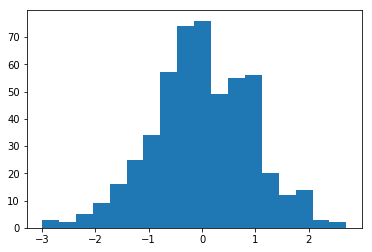

In [250]:
x = np.random.normal(0, 1, size=512)

plt.hist(x, bins='auto');  # Bin size determined automatically by NumPy, see
                           # np.histogram

Above, we have seen the use of `plt.plot` and `plt.imshow`.  But often, when constructing
more complicated plots, using matplotlib's object oriented interface is more suited:

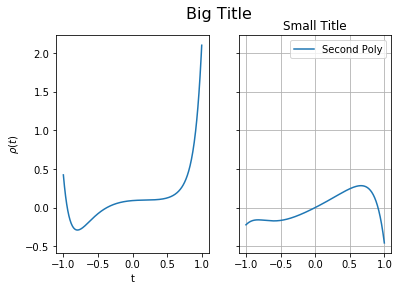

In [303]:
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

t = np.linspace(-1, 1, 500)
p0 = np.polynomial.Polynomial(np.random.random(15) - 0.5)
p1 = np.polynomial.Polynomial(np.random.random(15) - 0.5)

ax0.plot(t, p0(t))
ax0.set_xlabel('t')
ax0.set_ylabel(r'$\rho(t)$')

ax1.plot(t, p1(t), label='Second Poly')
ax1.legend()
ax1.grid()
ax1.set_title('Small Title')

f.suptitle('Big Title', fontsize=16)

Matplotlib has a [massive gallery](http://matplotlib.org/gallery.html).  Just find what you want and modify!

In [ ]:
%load http://matplotlib.org/mpl_examples/images_contours_and_fields/interpolation_methods.py

Of course, I have to say something about colormaps (mainly: don't use jet).

## SciPy

### Where to get help

- docstrings (via IPython / Jupyter `?`-syntax)
- http://docs.scipy.org, specifically https://docs.scipy.org/doc/scipy/reference/
- Forums: mailing list, http://stackoverflow.com

### Where do I learn more?

- <a href="http://scipy-lectures.github.com">SciPy Lectures</a>

### Exercise: Optimization

In [320]:
import scipy as sp
from scipy import optimize

def f(xy):
    print('Called f at:', xy)
    x, y = xy.T
    return x**2 + y**2

optimize.minimize(f, [5, 5])

Called f at: [ 5.  5.]
Called f at: [ 5.00000001  5.        ]
Called f at: [ 5.          5.00000001]
Called f at: [ 5.  5.]
Called f at: [ 4.28582215  4.28582215]
Called f at: [ 4.28582215  4.28582215]
Called f at: [ 4.28582217  4.28582215]
Called f at: [ 4.28582215  4.28582217]
Called f at: [ 2.72298414  2.72298414]
Called f at: [ 2.72298414  2.72298414]
Called f at: [ 2.72298415  2.72298414]
Called f at: [ 2.72298414  2.72298415]
Called f at: [ -1.50125594e-07  -1.50125594e-07]
Called f at: [ -1.50125594e-07  -1.50125594e-07]
Called f at: [ -1.35224433e-07  -1.50125594e-07]
Called f at: [ -1.50125594e-07  -1.35224433e-07]


      fun: 4.507538778807646e-14
 hess_inv: array([[ 0.75000001, -0.24999999],
       [-0.24999999,  0.75000001]])
      jac: array([ -2.85350026e-07,  -2.85350026e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ -1.50125594e-07,  -1.50125594e-07])

#### minimize

- Implement one of the test functions at: https://en.wikipedia.org/wiki/Test_functions_for_optimization
- Using `scipy.optimize.minimize`, find the minimum of your test function.
- Confirm that the answer you got is the same as that given by Wikipedia.

#### basin hopping

Sometimes, minimization algorithms can get trapped in local minima.

- Use `scipy.optimize.basinhopping` with the method you tried above.  This should
ensure that you more often land at the correct non-local minimum!

### Exercise: integrating periodic functions

In a [recent blog post](https://www.johndcook.com/blog/2017/03/01/numerically-integrating-periodic-functions/), John Cook shows that there are functions for which the trapezoid rule for integration does not work very well.

For this one it works great:

$g(x) = \exp(\cos(x))$

But not for:

$h(x) = \exp\left(1-x^2/2\right)$

- Implement both functions, taking care to make the latter periodic
- Use `scipy.integrate.trapz` to find their integrals between $[-\pi, \pi]$
- Create a plot of sample point vs accuracy, as in the end of the blog post

The exact solution for $g$ is:

$2 \pi I_0(1)$

And for $h$:

$e \sqrt{2\pi}\ \mathrm{erf} \left(\frac{\pi \sqrt{2}}{2} \right)$

In [337]:
from scipy.special import erf, iv  # <-- you'll need these!
from scipy import integrate

In [374]:
def h(x):
    return ...

def g(x):
    return ...

In [ ]:
N = np.arange(2, 10)

errors_g = []
errors_h = []

for n in N:
    t = np.linspace(-np.pi, np.pi, n, endpoint=True)
    
    ...
    errors_g.append()
    
    ...
    errors_h.append()

plt.semilogy(N, errors_g, label='Error for g')                                  
plt.semilogy(N, errors_h, label='Error for h')                                  
plt.legend()                                                                   
plt.xlabel('Integration points')                                               
plt.ylabel('Log of absolute error')   

Full solution in: `trapz_periodic_error.py`

Why do we see this behavior?  Read the blog post for more detail!